# Clustering Comparison


In this Notebook I compare my own implementation of three very basic clustering methods with the scikit learn implementation. 

NOTE: All my implementations were made from scratch and with a focus on comprehensibility. Therefore they are currently very unefficient and only for 2 Dimensions.

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
import collections

##### Sample Data

Let's use sklearn to create some nice sample data.

In [2]:
n_samples = 500
X = {}
y = collections.defaultdict(dict)
X['blobs'],y['blobs']['y'] = make_blobs(n_samples=n_samples, centers=2, n_features=2)
X['moons'],y['moons']['y'] = make_moons(n_samples=n_samples, noise=0.01)
X['circles'],y['circles']['y'] = make_circles(n_samples=n_samples, factor=.5,noise=.05)

##### Plotting

Create a little function to do the plots.

In [3]:
def plot_helper(clf_skl, clf_scr):
    lg = len(X)
    ax=[]
    j=1
    plt.rcParams["figure.figsize"] = [10,10]
    fig = plt.figure()
    for key in X:
        clf_skl.fit(X[key])
        clf_scr.fit(X[key])
        y[key]['skl'] = clf_skl.labels_
        y[key]['scr'] = clf_scr.labels_
        for k in y[key]:
            ax.append(fig.add_subplot(3,lg,j))
            ax[j-1].scatter(X[key][:,0],X[key][:,1], c=y[key][k], cmap='rainbow')
            ax[j-1].axis('off')
            ax[j-1].set_title(k)
            j +=1
    plt.axis('off') 
    plt.show()

### KMeans

The goal of k-Means is to divide the data set into k partitions in such a way that the sum of the squared deviations from the cluster centers of gravity is minimal. Mathematically, this corresponds to the optimization of the function

$J = \sum_{i=1}^{k}  \sum_{\mathbf x_j \in S_{i}} {\| \mathbf x_j - \boldsymbol \mu_i \|^2}$

The k-means algorithm is one of the fastest clustering algorithms available, but drops into local minima very often.

Implementation from scratch yields same results as sklearn.

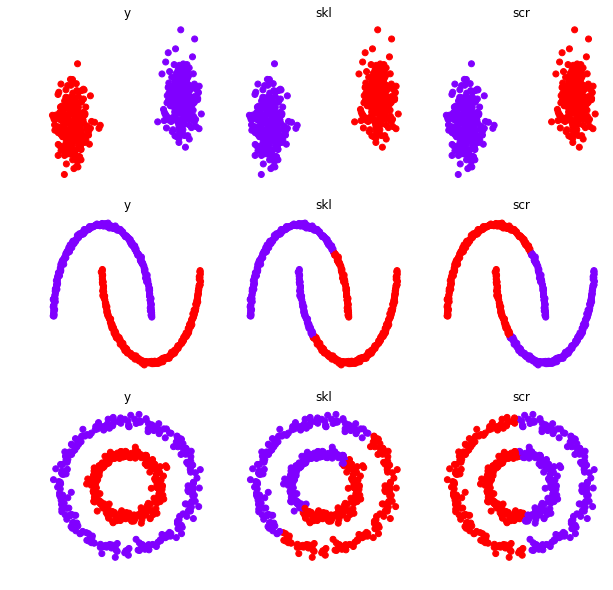

In [4]:
from kmeans_scratch import K_Means
clf_skl = KMeans(2)
clf_scr = K_Means(2)
plot_helper(clf_skl, clf_scr)

### DBSCAN

DBSCAN - Density-based spatial clustering of applications with noise. Finds and extends high-density core samples. Good for data with clusters of similar density.

Implementation from scratch yields same results as sklearn.

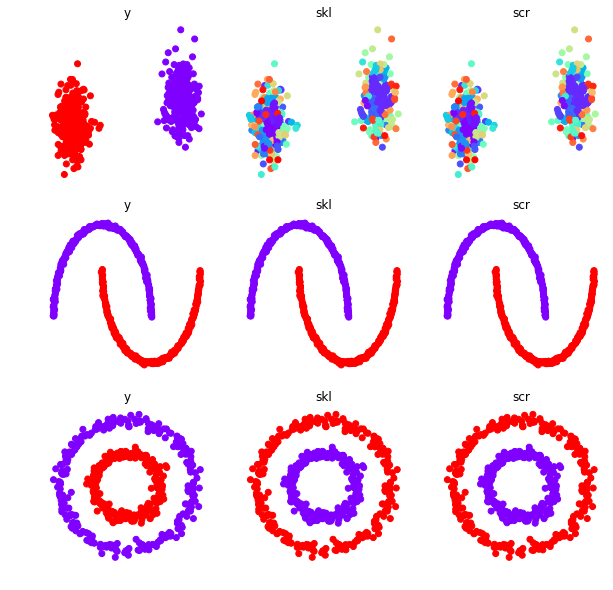

In [5]:
from dbscan_scratch import DB_SCAN
clf_skl = DBSCAN(0.2, 0.005)
clf_scr = DB_SCAN(0.2, 0.005)
plot_helper(clf_skl, clf_scr)

### MeanShift

Meanshift iteratively assigns the data points to clusters by moving the points towards the mode (highest density of data points).
In principal, we

1. Start with every datapoint as a cluster center
2. Take the mean of a bandwidth around cluster, setting that as new cluster center
3. Repeat 2. until convergence.

Implementation from scratch is a bit off -- work in progress!
- Current radius for neighbours is 3*bandwidth (change here)

centers converged
centers converged
centers converged


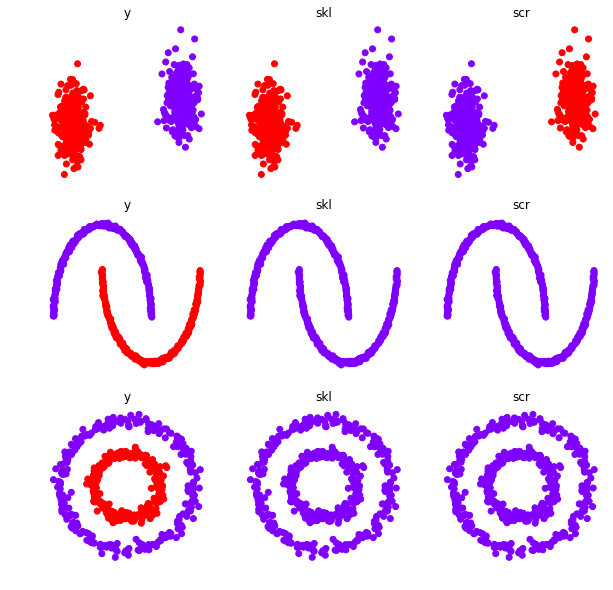

In [6]:
from meanshift_scratch import Mean_Shift
clf_skl = MeanShift(2)
clf_scr = Mean_Shift(2)
plot_helper(clf_skl, clf_scr)